# Quantum Teleportation

**Resources** https://qiskit.org/textbook/ch-algorithms/teleportation.html


### Overview

There exists a theorem in quantum mechanics which states that you cannot simply make an exact copy of an unknown quantum state. This is known as the no-cloning theorem. As a result of this we can see that Alice can't simply generate a copy of  |𝜓⟩  and give the copy to Bob. We can only copy classical states (not superpositions).

In [31]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize

from qiskit.quantum_info import random_statevector


from utility import *

In [2]:
qr = QuantumRegister(3)    # Protocol uses 3 qubits
crz = ClassicalRegister(1) # and 2 classical bits
crx = ClassicalRegister(1) # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)

In [3]:
def create_bell_pair(qc, a, b, print_state_vec=False):
    "creates a bell pair in qc using qubits a and b"
    qc.h(a)
    qc.cx(a,b)
    if print_state_vec :
        state = get_state_vector(qc)
        print (state)
        

In [4]:
def test_bell_pair():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    state = get_state_vector(qc)    
    print (state)
test_bell_pair()

[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


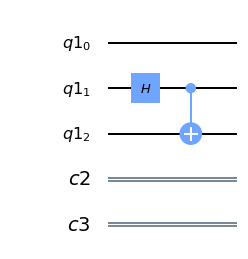

In [5]:
qr = QuantumRegister(3)    
crz = ClassicalRegister(1) 
crx = ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)  
teleportation_circuit.draw(output='mpl')

Let's say Alice owns  $q_1$  and Bob owns  $q_2$  after they part ways.

Alice applies a CNOT gate to  $q_1$ , controlled by  |𝜓⟩  (the qubit she is trying to send Bob). Then Alice applies a Hadamard gate to  |𝜓⟩ . In our quantum circuit, the qubit ( |𝜓⟩ ) Alice is trying to send is  $q_0$ :

In [6]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

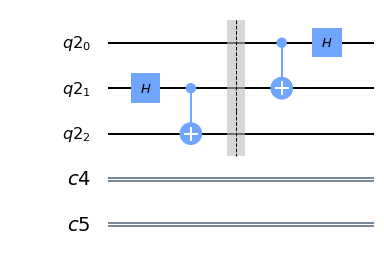

In [7]:
qr = QuantumRegister(3)    
crz = ClassicalRegister(1) 
crx = ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(qr, crz, crx)
create_bell_pair(teleportation_circuit, 1, 2) 
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw(output='mpl')


Next, Alice applies a measurement to both qubits that she owns,  $q_1$  and  |𝜓⟩ , and stores this result in two classical bits. She then sends these two bits to Bob.

In [8]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)
    

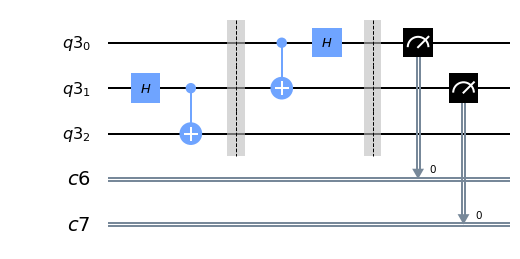

In [9]:
#Set up
qr = QuantumRegister(3)    
crz = ClassicalRegister(1) 
crx = ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(qr, crz, crx)

# step 1
create_bell_pair(teleportation_circuit, 1, 2) 

#step 2
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

#step 3
measure_and_send(teleportation_circuit, 0, 1)
teleportation_circuit.draw(output='mpl')


Bob, who already has the qubit  $1_2$ , then applies the following gates depending on the state of the classical bits:

* 00  →  Do nothing

* 01  →  Apply  𝑋  gate

* 10  →  Apply  𝑍  gate

* 11  →  Apply  𝑍𝑋  gate

In [10]:
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

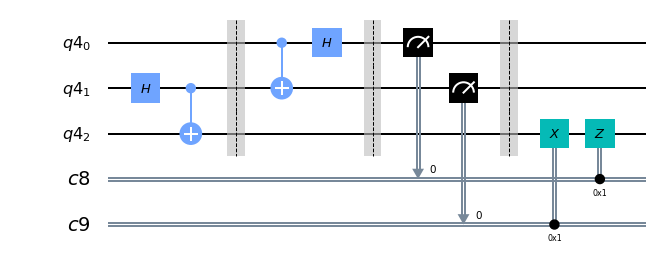

In [11]:
#Set up
qr = QuantumRegister(3)    
crz = ClassicalRegister(1) 
crx = ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(qr, crz, crx)

# step 1
create_bell_pair(teleportation_circuit, 1, 2) 

#step 2
teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

#step 3
measure_and_send(teleportation_circuit, 0, 1)

# step 4
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw(output='mpl')


[ 0.24727743-0.58893581j -0.24484679-0.72942343j]


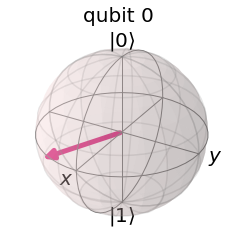

In [28]:
from qiskit.quantum_info import random_statevector
psi = random_statevector(2).data

print (psi)

plot_bloch_multivector(psi)

In [13]:
from IPython.display import display, Markdown, Latex
display(Latex('$\psi$'))

<IPython.core.display.Latex object>

In [29]:
init_gate = Initialize(psi)

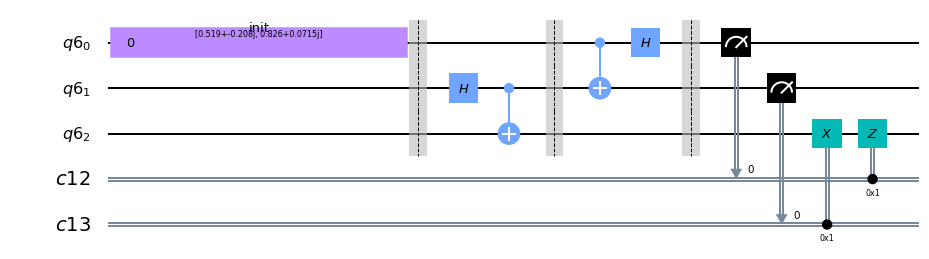

In [33]:
#Set up
qr = QuantumRegister(3)    
crz = ClassicalRegister(1) 
crx = ClassicalRegister(1)
qc = QuantumCircuit(qr, crz, crx)

psi = random_statevector(2).data
init_gate = Initialize(psi)
init_gate.label = "init"

# step 0
qc.append(init_gate, [0] )
qc.barrier()

# step 1
create_bell_pair(qc, 1, 2) 
qc.barrier()

#step 2
alice_gates(qc, 0, 1)

#step 3
measure_and_send(qc, 0, 1)

# step 4
#qc.barrier()
bob_gates(qc, 2, crz, crx)
qc.draw(output='mpl')
